# Problem description

Let's suppose you have to test 2 buttons on a webpage to see how many people subscribe to newsletter by clicking on the buttons.
<br>The first one is yellow and the second one is blue. 

<img src="assets/AB_1.gif" width="600" height="600">

You design an A/B test, randomly assign the users to each treatment group and get the following results:
* The button A was seen by 10000 users and 800 subscribed.
* The button B was seen by 10500 users and 1200 subscribed.

## Everything is ready to evaluate the results and see whether we have a winner or not.

<br> Note that we are tempted to conclude that B is a winner as it has a higher conversion rate than A (11.4% vs 8%). 

# Importing the dependencies

In [1]:
from AB import ABConversion #custom class of evaluating the experiment results
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### 1. Setting the conversion numbers

In [2]:
N_c = 10000 

N_t = 10500

conv_c = 800/N_c
conv_t = 1200/N_t

### 2. Running the experiment

In [3]:
exp = ABConversion(N_c, N_t, conv_c, conv_t) # custom values of alpha and power can be provided, defaults are 0.05 and 0.8

### 3. Setting the baseline values and minimum detectable effects for minimum sample size calculations.

Let's suppose, for us the baseline conversion value is 0.08 (or 8%)/ conversion of variant A.
<br> And we are trying to detect whether variant B is at least 25% better than A.

In [4]:
baseline_value = 0.08 # use <<baseline_value =conv_c>> to see how many users you need in each treatment group
                      # to get a statistically significant difference and also desired level of statistical power

min_det_effect = 0.25 # use <<min_det_effect = conv_t/conv_c-1>> as above

exp.baseline_value = baseline_value
exp.min_det_effect = min_det_effect

### 4. Displaying key stats of the experiment before running it (most importantly minimum sample size).

In [5]:
exp.pre_experiment_stats()

Alpha:				0.05
Power:				0.80
Baseline value:			0.0800000
Minimum detectable effect:	0.0200000
Treatment value:		0.1000000
Minimum sample size:		3210


As we see, we needed only 3210 users in each group to get at least 80% statistical power.

In [6]:
exp.return_sample_stats()

============ Control ============
Sample size:		10000
Value:			0.0800000
Standard deviation:	0.2712932
=========== Treatment ===========
Sample size:		10500
Value:			0.1142857
Standard deviation:	0.3181580


### 5. Evaluating the experiment: Is the difference between groups statistically significant?

In [7]:
exp.hypothesis_summary()

p = 0.0000. We reject the Null hypothesis. The difference is statistically significant on significance level: 95%.
test statistic:				8.3154
Degrees of freedom:			20498
p-value (Probability of Type I error):	0.0000
Alpha:					0.05
Beta (Probability of Type II error):	0.0000
Power:					1.0000


In [8]:
# if needed, we can simulate the experiment with data to see how many times we get erroneous results/

for i in range(10):
     exp.simulate_with_data(eq_var = False)

t:	 -9.457998591013288 	p:	 3.472834453057783e-21
t:	 -7.507474801750589 	p:	 6.276382734746791e-14
t:	 -8.114352937646364 	p:	 5.159886155499668e-16
t:	 -8.197408903315177 	p:	 2.6010145574445056e-16
t:	 -10.08826855927086 	p:	 7.096430929881338e-24
t:	 -10.37182004623878 	p:	 3.8570088857810033e-25
t:	 -7.825722517954494 	p:	 5.293668782462861e-15
t:	 -8.174847635068183 	p:	 3.1349537279796135e-16
t:	 -8.973630485420989 	p:	 3.1141960032836733e-19
t:	 -7.9507502178699925 	p:	 1.9503764153723276e-15


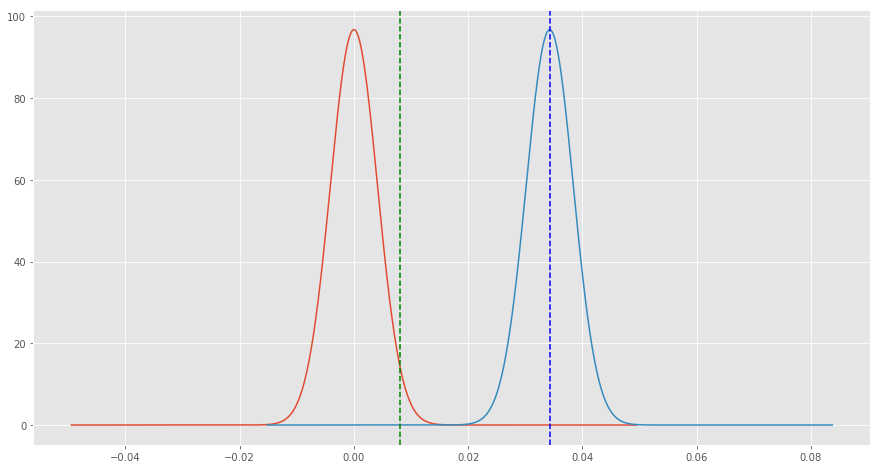

In [9]:
exp.plot_hypothesis_distributions(green_line = True, blue_line=True) # green line - 95% percentile of the Null hypothesis,
                                                                     # blue line - the difference between groups

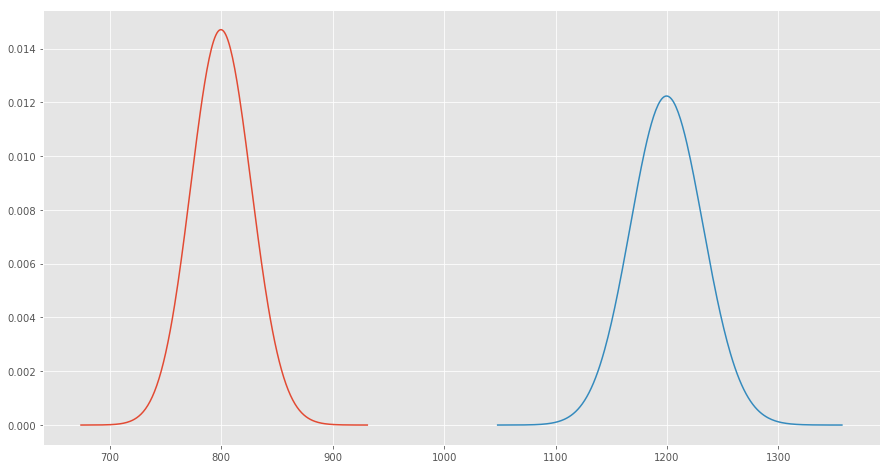

In [10]:
exp.plot_groups_distributions()